In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px

# Time-series Data

In this part, we focus on processing the video time-series data. Two goals are to be achieved: 

1) **Detect a potential increase in views and subscribers for mental health related channels** : this goal can underline a possible trends and their behaviours. 

2) **Explore the distributions of views and subscribers** : for this goal, we can do it once with all the datetimes, once with first datetime for each channel (fixed time) and one for the last datetime. 

### 1. Exploratory analysis 
In this part, we will perform an exploratoring analysis on our time series dataset to observe the distribution of data within this dataset and to check the correspondence with the others (i.e. the first channel).

In [64]:
# Loading the dataset
folder = "./data/"
df_timeseries = pd.read_csv(folder + "df_timeseries_en.tsv", sep="\t")

# Convert 'datetime' column to datetime object
df_timeseries['datetime'] = pd.to_datetime(df_timeseries['datetime'])

# Displaying the dataset
df_timeseries.head(2)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,202494.555556,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,394085.666667,191591.111111,1046.000000,395.777778,6,1,1


In [65]:
# Let's see the category
categories = df_timeseries['category'].unique()
print(categories)

['Film and Animation' 'Music' 'Comedy' 'Gaming' 'Science & Technology'
 'Sports' 'Entertainment' 'Education' 'Nonprofits & Activism'
 'People & Blogs' 'Howto & Style' 'News & Politics' 'Travel & Events'
 'Autos & Vehicles' 'Pets & Animals' nan]


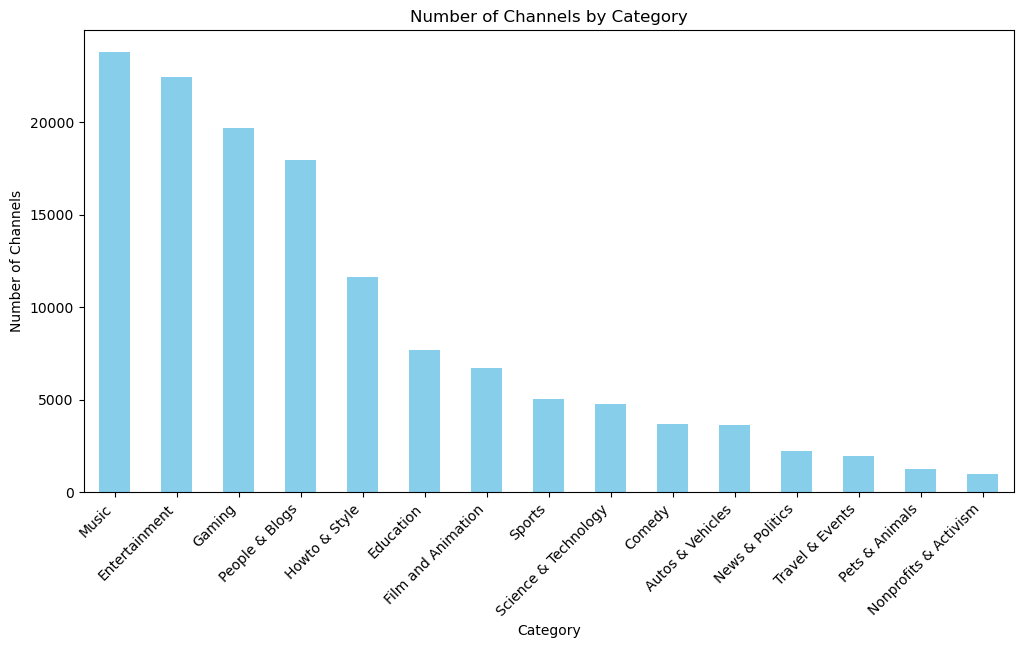

In [66]:
# Counting the number of unique channels for each category
channel_counts = df_timeseries.groupby('category')['channel'].nunique()

# Sorting categories by channel count
sorted_categories = channel_counts.sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sorted_categories.plot(kind='bar', color='skyblue')
plt.title('Number of Channels by Category')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.xticks(rotation=45, ha='right')
plt.show()

In [67]:
# # Counting the number of unique channels for each category
# channel_counts_imeseries = df_timeseries.groupby('category')['channel'].nunique().reset_index(name='channel_count')

# # Sorting categories by channel count
# sorted_categories_timeseries = channel_counts_imeseries.sort_values(by='channel_count', ascending=False)

# # # Creating an interactive bar plot
# # fig = px.bar(sorted_categories_timeseries, x='category', y='channel_count', color='channel_count',
# #             labels={'channel_count': 'Number of Channels', 'category': 'Category'},
# #             title='Number of Channels by Category',
# #             width=1200, height=600)

# # # Show the plot
# # fig.show()

In [68]:
# Loading the metadata mental health related dataset
df_metadata = pd.read_csv(folder + "metadata_mental_best.csv")

# Displaying
df_metadata.head(2)

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,upload_month
0,Howto & Style,UCzWTH7VgNLUvxnC-mFJwO8Q,2019-11-22 22:25:49.938989,Today marks the 4 year anniversary of my ex bo...,30.0,HQAIQM_Um2Y,1494,1214.0,"alexis stone,alexis stone transformation",Processing Suicide | 4 Years After,2019-05-30,26436.0,2019-05
1,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:20:57.461781,A group at MIT’s Media Lab known as the “Dream...,118.0,ZBLejVwX85o,380,4778.0,"Judith Amores,MIT,sleep,dream,brain,neuroscien...",These Sleep Engineers Could Help You Hack Your...,2019-02-04,129857.0,2019-02


### Combining the metadata mental health dataset with the time series one :

In [70]:
# Creating a new sub-dataset from the time series one with only the channel_id coming from the metadata mental health dataset :
# Extract unique channel IDs from the metadata mental health dataset
mental_health_channel_ids = df_metadata['channel_id'].unique()

# Filter the time series dataset based on channel IDs
df_timeseries_mental_health = df_timeseries[df_timeseries['channel'].isin(mental_health_channel_ids)].copy()
timeseries_mental_health_channel_ids = df_timeseries_mental_health['channel'].unique()

# Set the normal indeces (0,1,2...)
df_timeseries_mental_health.reset_index(drop=True, inplace=True) 

# Display the new dataset
df_timeseries_mental_health.head(5)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-08-29,7766234.00,18652.00,31357.250,0.000,3071,0,20
1,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-09-05,7829982.00,63748.00,31581.000,223.750,3081,10,21
2,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-09-12,7884526.00,54544.00,31798.000,217.000,3090,9,22
3,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-09-19,7938265.00,53739.00,31986.125,188.125,3105,15,27
4,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-09-26,7995220.75,56955.75,32167.500,181.375,3126,21,38


In [71]:
print('Number of unique mental health related channels in the time series dataset :', len(timeseries_mental_health_channel_ids))

Number of unique mental health related channels in the time series dataset : 19137


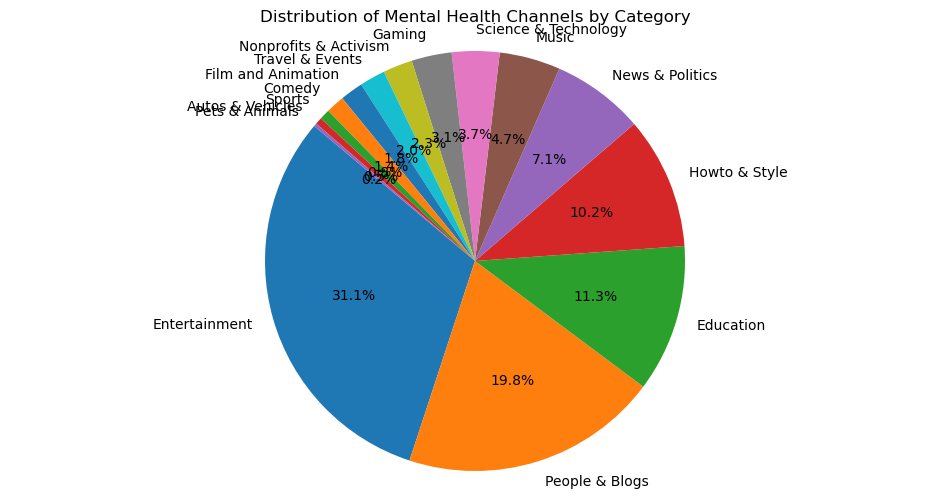

In [82]:
# Counting the number of unique channels for each category in the metadata mental health dataframe
channel_counts_metadata = df_timeseries_mental_health.groupby('category')['channel'].nunique().reset_index(name='channel_count')

# Sorting categories by channel count
sorted_categories_metadata = channel_counts_metadata.sort_values(by='channel_count', ascending=False)

# # Creating an interactive pie chart
# fig_pie = px.pie(sorted_categories_metadata, names='categories', values='channel_count',
#             title='Distribution of Mental Health Channels by Category')
# # Show the plot
# fig_pie.show()

# Plotting a pie chart
plt.figure(figsize=(12, 6))
plt.pie(sorted_categories_metadata['channel_count'], labels=sorted_categories_metadata['category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mental Health Channels by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [72]:
#sorting of the dataset for having each videos of one channel in order
df_timeseries_mental_health['datetime'] = pd.to_datetime(df_timeseries_mental_health['datetime'])  # Convert to datetime format

# Sort the DataFrame by "channel" and "datetime"
df_timeseries_mental_health = df_timeseries_mental_health.sort_values(by=['channel', 'datetime'])

# If you want to reset the index after sorting
df_timeseries_mental_health = df_timeseries_mental_health.reset_index(drop=True)

# Display the new dataset
df_timeseries_mental_health.head(5)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-01,62524.500,4113.500,1466.000,0.000,29,0,1
1,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-08,67600.250,5075.750,1508.625,42.625,30,1,2
2,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-15,69982.000,2381.750,1530.750,22.125,31,1,2
3,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-22,72663.125,2681.125,1558.625,27.875,32,1,2
4,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-29,75093.000,2429.875,1591.000,32.375,33,1,2


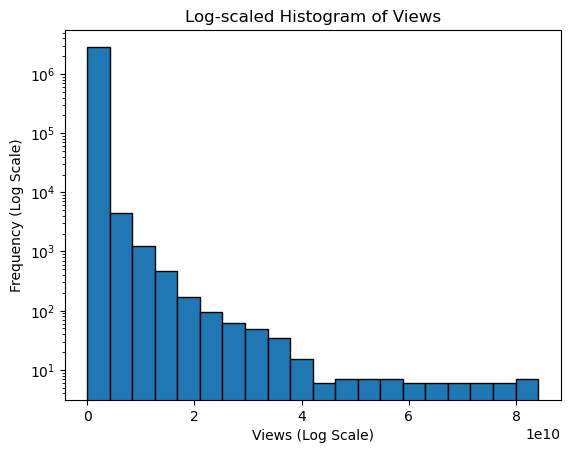

In [80]:
views = df_timeseries_mental_health['views']

# Create histogram with log scale on y-axis
plt.hist(views, bins=20, log=True, edgecolor='black')

# Set labels and title
plt.xlabel('Views (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Log-scaled Histogram of Views')

# Show the plot
plt.show()

In [74]:
# # Example for views distribution with log scale
# fig = px.histogram(df_timeseries_mental_health, x='views', nbins=20, log_y=True, title='Log-scaled Histogram of Views')
# fig.update_layout(xaxis_title='Views (Log Scale)', yaxis_title='Frequency (Log Scale)')

# # Show the plot
# fig.show()

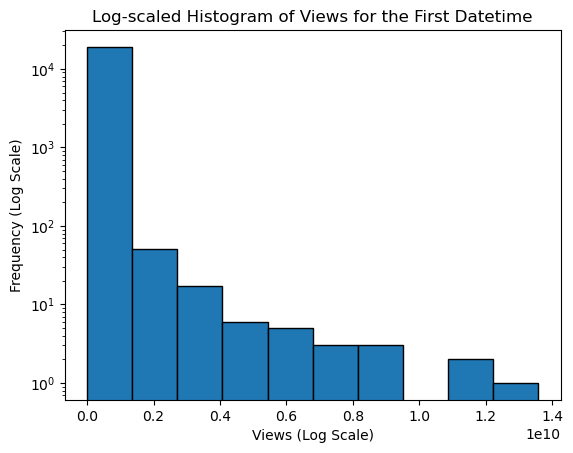

In [75]:
# Creation of a dataframe with just the first video for each channel
df_timeseries_mental_health['datetime'] = pd.to_datetime(df_timeseries_mental_health['datetime'])  # Convert to datetime format

# Find the index of the first datetime for each channel
first_datetime_index = df_timeseries_mental_health.groupby('channel')['datetime'].idxmin()

# Extract rows corresponding to the first datetime for each channel
df_first_datetime = df_timeseries_mental_health.loc[first_datetime_index]

# Extract the (first) views
views = df_first_datetime['views']

# Create histogram with log scale on y-axis
plt.hist(views, bins=10, log=True, edgecolor='black')

# Set labels and title
plt.xlabel('Views (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Log-scaled Histogram of Views for the First Datetime')

# Show the plot
plt.show()

In [76]:
# # Example for views distribution with log scale
# fig = px.histogram(df_first_datetime, x='views', nbins=10, log_y=True, title='Log-scaled Histogram of Views')
# fig.update_layout(xaxis_title='Views (Log Scale)', yaxis_title='Frequency (Log Scale)')

# # Show the plot
# fig.show()

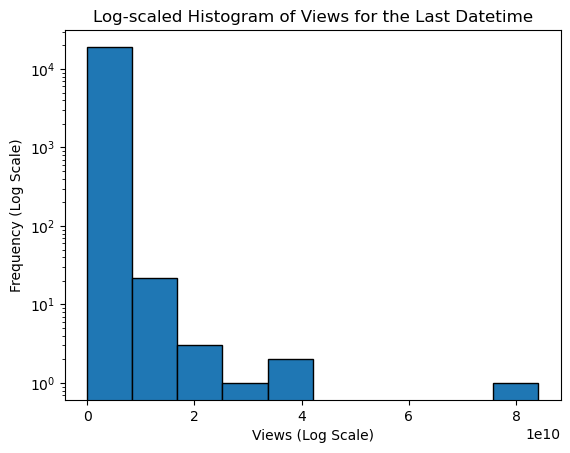

In [77]:
# Creation of a dataframe with just the last video for each channel
df_timeseries_mental_health['datetime'] = pd.to_datetime(df_timeseries_mental_health['datetime'])  # Convert to datetime format

# Find the index of the last datetime for each channel
last_datetime_index = df_timeseries_mental_health.groupby('channel')['datetime'].idxmax()

# Extract rows corresponding to the last datetime for each channel
df_last_datetime = df_timeseries_mental_health.loc[last_datetime_index]

# Extract the (last) views
views = df_last_datetime['views']

# Create histogram with log scale on y-axis
plt.hist(views, bins=10, log=True, edgecolor='black')

# Set labels and title
plt.xlabel('Views (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Log-scaled Histogram of Views for the Last Datetime')

# Show the plot
plt.show()

In [78]:
# # Example for views distribution with log scale
# fig = px.histogram(df_last_datetime, x='views', nbins=10, log_y=True, title='Log-scaled Histogram of Views')
# fig.update_layout(xaxis_title='Views (Log Scale)', yaxis_title='Frequency (Log Scale)')

# # Show the plot
# fig.show()

In [79]:
# Aggregate data across all channels with median
overall_data = df_timeseries_mental_health.groupby('datetime').agg({'delta_views': 'median'}).reset_index()

# Plotting overall delta_views over time with Plotly Express and log scale
fig = px.line(overall_data, x='datetime', y='delta_views',
            labels={'delta_views': 'Count', 'datetime': 'Date'},
            title='Overall Channel Performance Over Time (Median)',
            width=1200, height=600, log_y=True)

# Show the plot
fig.show()
